# Parameterisation

Once the potential energy function to be used for a particular interaction has been determined, it is then necessary to **parameterise** the function. 
If we think back to the classical electrostatic interaction between two oppositely charged point particles, we would set the values of $q_i$ and $q_j$ to be 1 and -1, for modelling the interaction between a sodium and chloride ion pair. 
This was the parameterisation step for that system. 

For an ion pair with integer charges this is straight-forward. 
However, consider modelling the potential energy between a carbonyl oxygen atom of a hydrocarbon molecule and the hydrogen atom of a water molecule. 
Both of these have some charged character, however, this is **ill defined**, but must be accounted for.

The difficulty of deducing the correct parameterisation is inherent to **all** potential energy functions. 
For the Lennard-Jones function, the parameterisation involves determining the best possible values for $A$ and $B$. 

## How to parameterise a potential model?

The purpose of parameterisation is to create a potential energy model that is able to **accurately reproduce** the energy of a given interaction. 
This means that the parameters should really be obtained by optimising them with respect to a **more accurate** technique than classical simulation. 
Commonly this involves either experimental measurements, e.g. X-ray crystallography, or quantum mechanical calculations; we will be focusing on the latter. 

More can be found out about quantum mechanical calculations in the textbooks mentioned in the introduction (in particular Jeremy Harvey's Computational Chemistry Primer [[1](#references)]).
However, for our current purposes we only need to remember the previous lesson where it was introduced that quantum calculations are more accurate than classical simulations.

### Quantum mechanical calculations

These are more accurate then classical simulations. However, they are severely limited in the system size, with a maximum simulation size in the order of hundreds atoms. 

We will stick with the example of a Lennard-Jones interaction, however the arguments and methods discussed are **extensible to all different interaction types**. 
To generate the potential energy model between two particles of argon, we could conduct quantum mechanical calculations at a range of inter-atom separations, from 3 to 8 Å, finding the energy between the two particles at each separation.

The Python code below plots the energy vs distances that may be obtained from a quantum mechanical calculation. 

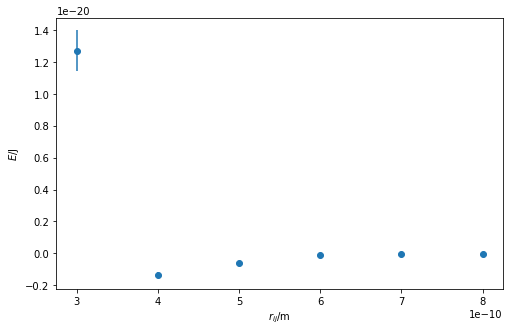

In [4]:
import matplotlib.pyplot as plt
import numpy as np

rij = [3e-10, 4e-10, 5e-10, 6e-10, 7e-10, 8e-10]
energy = [127.27e-22, -13.52e-22, -6.37e-22, -1.42e-22, -0.58e-22, -0.25e-22]
energy_err = [12.92e-22, 1.45e-22, 0.54e-22, 0.19e-22, 0.08e-22, 0.04e-22]

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.errorbar(rij, energy, yerr=energy_err, marker='o', ls='')
ax.set_xlabel(r'$r_{ij}$/m')
ax.set_ylabel(r'$E$/J')
plt.show()

We can already see that the general shape of the curve is similar to a Lennard-Jones (or Buckingham) interaction.
There is a well at the **equilibrium bond distance** and a steep incline as the particles come **too close** together. 
It is possible to then fit a Lennard-Jones function to this data, the Python code below does this using a simple least-squares fit.

In [5]:
from scipy.optimize import curve_fit

def lj_energy(rij, a, b):
    """
    Implementation of the Lennard-Jones potential 
    to calculate the energy of the interaction.
    
    Parameters
    ----------
    rij: float
        Distance between particles i and j
    a: float 
        A parameter for interaction between i and j
    b: float 
        B parameter for interaction between i and j
    
    Returns
    -------
    float
        Energy of the interaction between i and j.
    """
    return a / np.power(rij, 12) - b / np.power(rij, 6)
    
popt, pcov = curve_fit(lj_energy, rij, energy, sigma=energy_err)
print('Best value for a = {:.2e} J/m12'.format(popt[0]))
print('Best value for b = {:.2e} J/m6'.format(popt[1]))

Best value for a = 1.25e-134 J/m12
Best value for b = 8.17e-78 J/m6


If we plot a Lennard-Jones function with the values fitted and the quantum mechnical data on a single plot, we can see that there is **relatively good agreement** between the two. 
However, there is some deviation at 4 and 5 Å and therefore more quantum mechnical calculations would **required** to produce a truely accurate forcefield. 

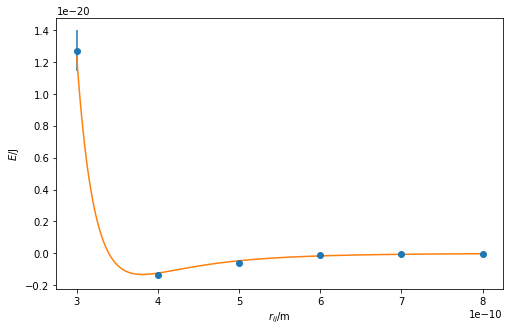

In [6]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.errorbar(rij, energy, yerr=energy_err, marker='o', ls='')
x = np.linspace(3e-10, 8e-10, 1000)
ax.plot(x, lj_energy(x, popt[0], popt[1]))
ax.set_xlabel(r'$r_{ij}$/m')
ax.set_ylabel(r'$E$/J')
plt.show()

Note that it would be necessary to carry out this process for **every** interaction in your calculation, e.g. bond lengths, bond angles, dihedral angles, van der Waals and Coulombic interactions forces, etc. 
Furthermore, it is important to remember the **different chemistry** that is present for each atom. 
For example, a carbon atom in a carbonyl group will not act the same as the carbon atom in a methane molecule. 
To carry out these calculations for *every* molecular dynamics simulation that you wish to perform very quickly becomes highly unfeasible.

## References

1. Harvey, J. *Computational Chemistry*; Oxford University Press: Oxford, 2018.